# Bitwise Operations
###### by: João Ataíde
---

In [4]:
#Importando as bibliotecas
import cv2
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'
%matplotlib inline

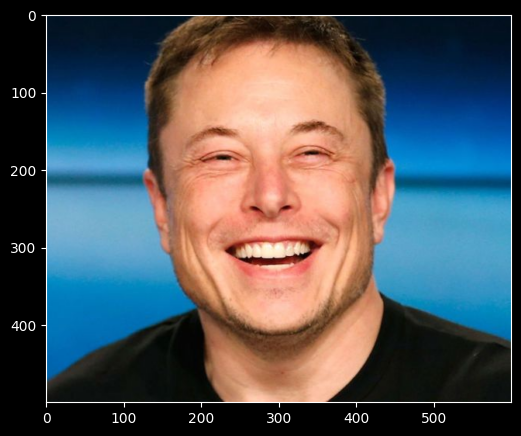

In [5]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w1 - Getting Started\data"

imagePath = f"{DATA_PATH}\\images\\musk.jpg"
image = cv2.imread(imagePath, 1)
plt.imshow(image[:,:,::-1]);

## Bitwise Operations
*  cv2.bitwise_and
*  cv2.bitwise_or
*  cv2.bitwise_not
*  cv2.bitwise_xor

In [6]:
#dst = cv2.bitwise_XXX(src1, src2[, dst[, mask]])

In [7]:
faceWithGlassesBitwise = image.copy()

glassimagePath = f"{DATA_PATH}\\images\\sunglass.png"
glassPNG = cv2.imread(glassimagePath,-1)

image Dimension =(100, 300, 4)


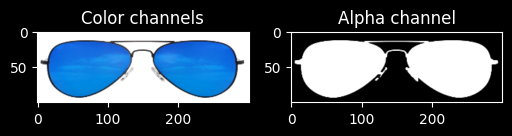

In [8]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(300,100))
print("image Dimension ={}".format(glassPNG.shape))

# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]
plt.style.use('dark_background')
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Alpha channel');

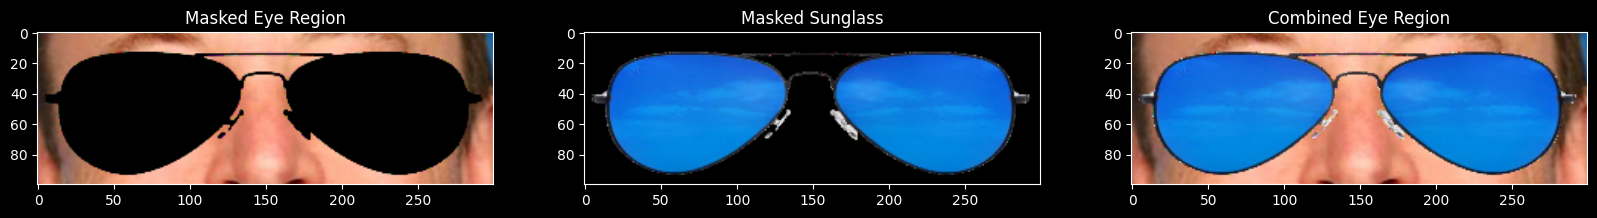

In [9]:
# Get the eye region from the face image
eyeROI= faceWithGlassesBitwise[150:250,140:440]

# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))

# Use the mask to create the masked eye region
eye = cv2.bitwise_and(eyeROI, cv2.bitwise_not(glassMask))

# Use the mask to create the masked sunglass region
sunglass = cv2.bitwise_and(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.bitwise_or(eye, sunglass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(eye[:,:,::-1]);plt.title("Masked Eye Region");
plt.subplot(132);plt.imshow(sunglass[:,:,::-1]);plt.title("Masked Sunglass");
plt.subplot(133);plt.imshow(np.uint8(eyeRoiFinal)[:,:,::-1]);plt.title("Combined Eye Region");

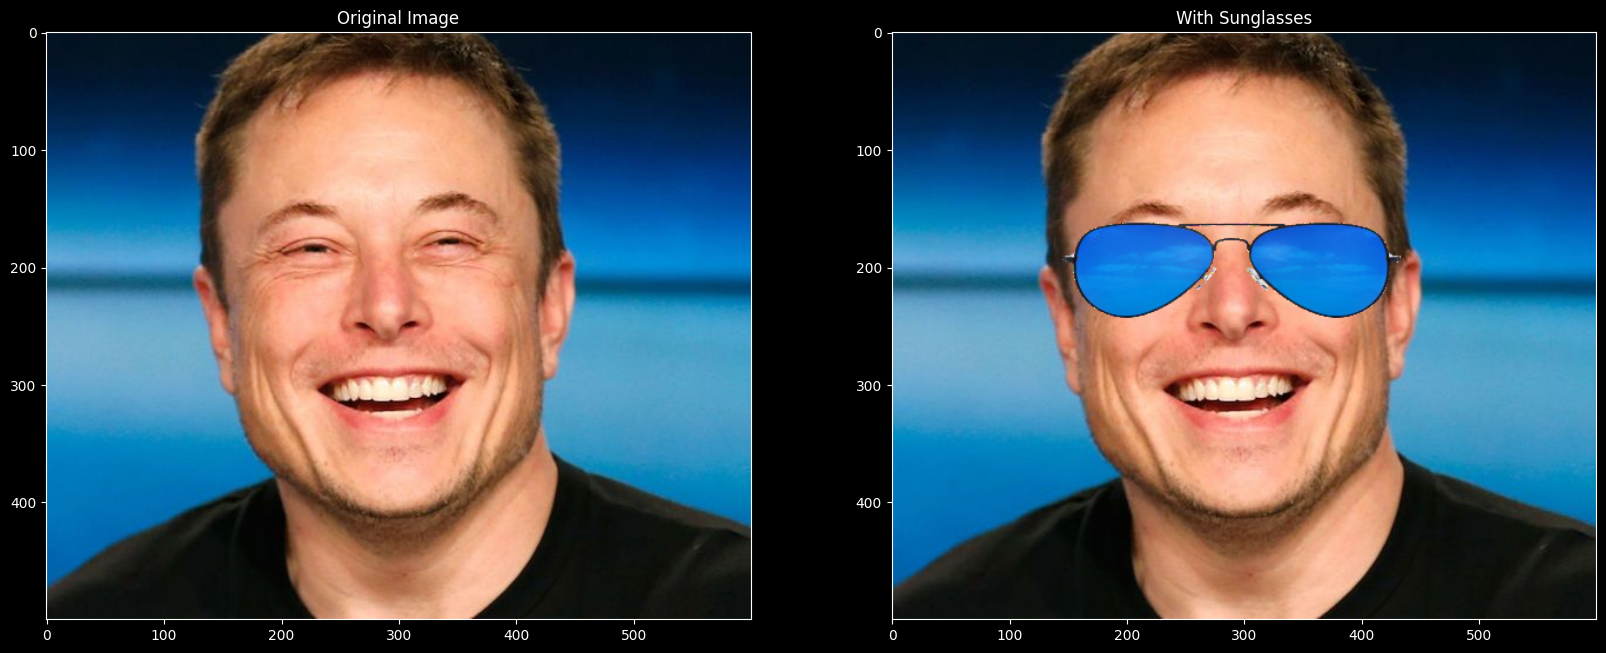

In [10]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesBitwise[150:250,140:440]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(image[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesBitwise[:,:,::-1]);plt.title("With Sunglasses");

https://docs.opencv.org/4.1.0/d0/d86/tutorial_py_image_arithmetics.html
https://en.wikipedia.org/wiki/Bitwise_operation
https://www.youtube.com/watch?v=mc846qb0ngk
https://pysource.com/2018/01/29/bitwise-operators-opencv-3-4-with-python-3-tutorial-7/